#Curso de Desarrollo en Lenguaje Python para Inteligencia Artificial
###Nerea Luis @sailormerqury
### https://nerealuis.es

Subid los archivos dentro de la carpeta Modelos Preentrenados, o conectad vuestro Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Nos movemos hasta la carpeta

In [2]:
%cd /content/drive/MyDrive/Modelos preentrenados

/content/drive/.shortcut-targets-by-id/1_NsAab0ScVKj_f9DridcEE8NTLRCLq2g/Modelos preentrenados


In [3]:
%ls

deeplabv3_xception65_ade20k.h5  mask_rcnn_coco.h5  pointrend_resnet50.pkl


#Utilizando modelos preentrenados con Pixellib

Información sobre la librería y más tutoriales:
https://github.com/ayoolaolafenwa/PixelLib

##Instalamos la librería

In [4]:
!ls -l

total 649321
-r-------- 1 root root 166228952 Aug 17  2021 deeplabv3_xception65_ade20k.h5
-r-------- 1 root root 257557808 Aug 18  2021 mask_rcnn_coco.h5
-r-------- 1 root root 241116772 Aug 18 05:16 pointrend_resnet50.pkl


In [5]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.2.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
antlr4-python3-runtime        4.9.3
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.4
Babel                         2.10.3
backcall                      0.2.0
beautifulsoup4                4.6.3
black                         22.6.0
bleach                        5.0.1
blis                          0.7.8
bokeh

In [6]:
!pip install pixellib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install pixellib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Segmentación de instancias en imágenes con dataset COCO y modelo PointRend model

In [9]:
%ls

deeplabv3_xception65_ade20k.h5  mask_rcnn_coco.h5  pointrend_resnet50.pkl


In [10]:
import pixellib
from pixellib.torchbackend.instance import instanceSegmentation

ins = instanceSegmentation()
ins.load_model("pointrend_resnet50.pkl")
results, output = ins.segmentImage("/content/fr.jpg", show_bboxes=True, output_image_name="/content/output_image.jpg")

  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
/usr/local/lib/python3.7/dist-packages/pixellib/torchbackend/instance/structures/image_list.py:99: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.7/dist-packages/pixellib/torchbackend/instance/point_rend/point_f

(-0.5, 2625.5, 1820.5, -0.5)

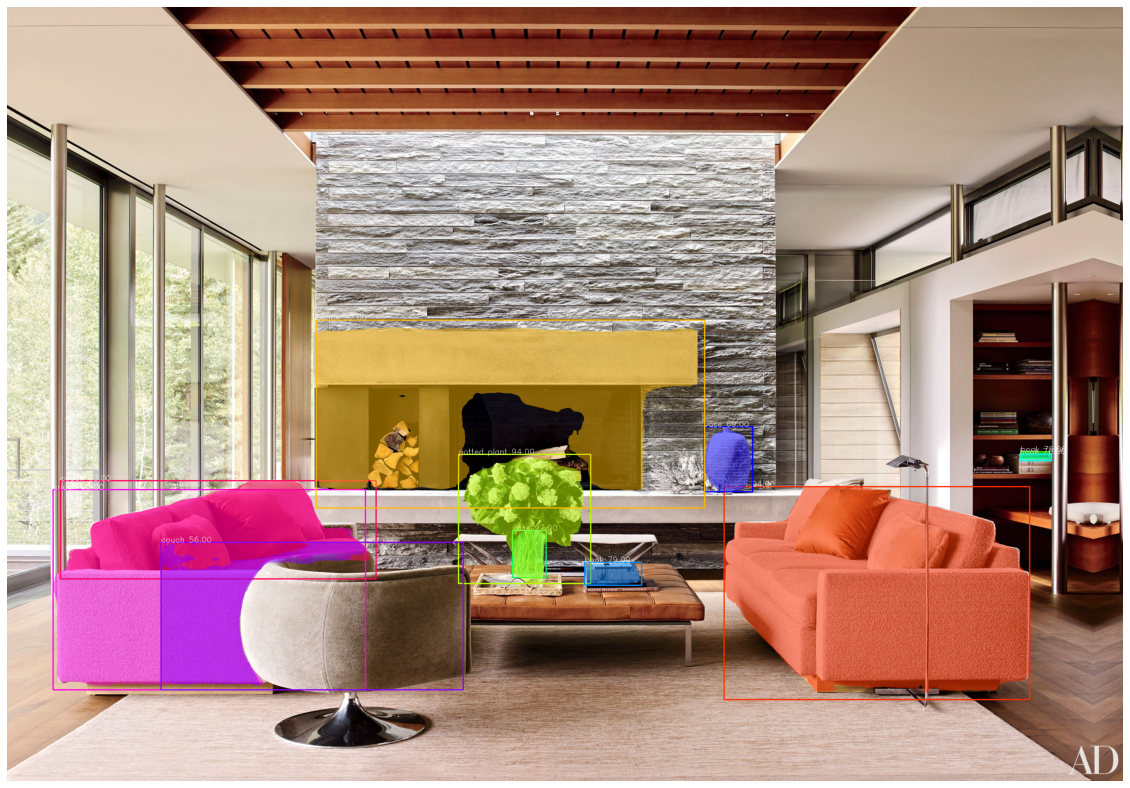

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
output_rgb = output[:, :, ::-1] #BGR a RGB
plt.imshow(output_rgb)
plt.axis('off')
#plt.savefig("output_image.jpg")

##Segmentación semántica con Ade20k dataset y Xception model

Lista de clases de Ade20k https://github.com/CSAILVision/sceneparsing/blob/master/objectInfo150.csv

In [12]:
!pip3 install tensorflow==2.6.0
!pip3 install keras==2.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564.4 MB 2.5 kB/s 
     |████████████████████████████████| 14.8 MB 7.3 MB/s 
     |████████████████████████████████| 132 kB 6.8 MB/s 
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30694 sha256=f0c75dfce13d666eeacb5e90124df4f4c1338c4e73af7ba01431ab6bfffd9569
  Stored in directory: /root/.cache/pip/wheels/98/91/04/971b4c587cf47ae952b108949b46926f426c02832d120a082a
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68716 sha256=fd61d32eeab5aee60d9f17326f44318646e16ba03d4c87c837ad26b4351bcb5b
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built clang wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 10.7 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0


In [13]:
import pixellib
from pixellib.semantic import semantic_segmentation

segment_image = semantic_segmentation()
segment_image.load_ade20k_model("deeplabv3_xception65_ade20k.h5")
segmask, output = segment_image.segmentAsAde20k("/content/foto1.jpeg", overlay = True)

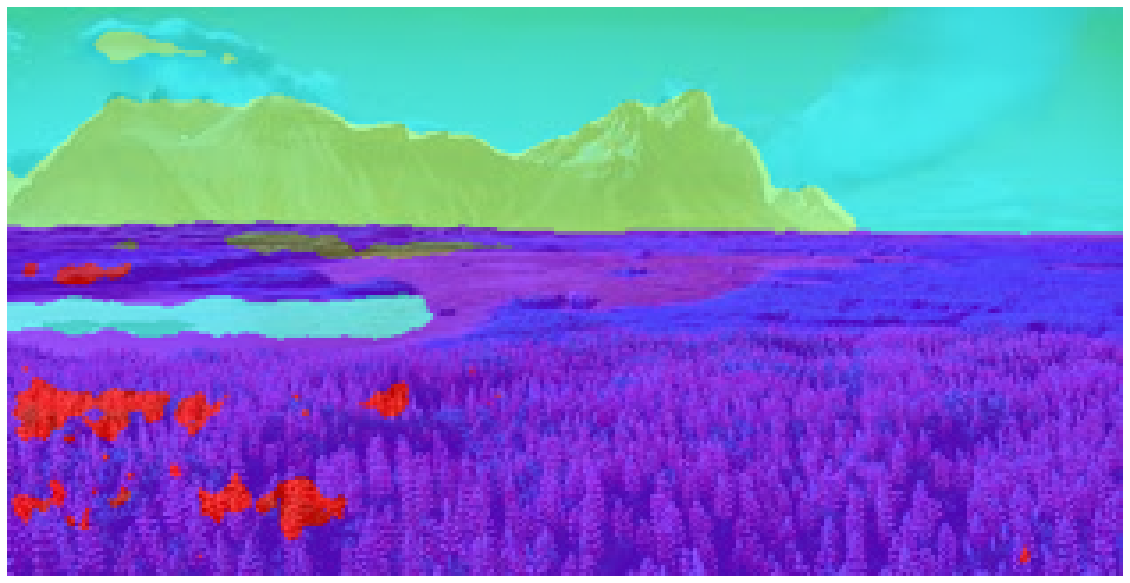

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
output_rgb = output[:, :, ::-1] #BGR a RGB
plt.imshow(output_rgb)
plt.axis('off')
plt.savefig("/content/im1_resultado.jpg")